# Pymaceuticals Inc.
---

### Analysis

- Based on the bar chart, Number of Mice Tested for Each Drug Regimen, notice that the four treatments we compare later on represent the two highest number of mice tested and two of the three lowest number of mice tested. We will need to keep this in mind when looking at the boxplot. It would be interesting to compare treatments with similar numbers of mice tested such as Zoniferol, Stelasyn, and Placebo. 
- The mice were pretty evenly distributed between male at 51% and female at 49%. 
- Based on the boxplot, Final Tumor Volume by Drug Regimen, the treatment Ramicane was the most successful of the four compared. Do keep in mind that there were more mice tested with Capomulin and Ramicane than Infubinol and Ceftamin. 
- Focusing on Capomulin in the Coorelation and Regression section, we see a positive coorelation between the weight of the mouse and the average tumor volume. It appears that the healthier mouse that weighs less, tends to have a lower average tumor volume and the mouse that weighs more, tends to have a higher average tumor volume. 

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "Starter_Code/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "Starter_Code/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_data_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [38]:
# Checking the number of mice.
combined_data_df['Mouse ID'].value_counts()

g989    13
s185    10
u196    10
s508    10
e476    10
        ..
f932     1
l872     1
n482     1
d133     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [39]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
by_Mouse_ID_df = combined_data_df.set_index('Mouse ID')

In [40]:
# Optional: Get all the data for the duplicate mouse ID. 
by_Mouse_ID_df.loc['g989']

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [41]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = by_Mouse_ID_df.drop(['g989'])
cleaned_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4


In [42]:
# Checking the number of mice in the clean DataFrame.
cleaned_df = cleaned_df.reset_index()
cleaned_df['Mouse ID'].value_counts()

t724    10
y163    10
s508    10
e476    10
q787    10
        ..
b447     1
f932     1
l872     1
x336     1
d133     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_vol = cleaned_df.groupby(['Drug Regimen'])
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_vol_mean = tumor_vol['Tumor Volume (mm3)'].mean()
tumor_vol_median = tumor_vol['Tumor Volume (mm3)'].median()
tumor_vol_variance = tumor_vol['Tumor Volume (mm3)'].var()
tumor_vol_stddev = tumor_vol['Tumor Volume (mm3)'].std()
tumor_vol_sem = tumor_vol['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary DataFrame.
tumor_vol_df = pd.DataFrame({'Mean Tumor Volume': tumor_vol_mean, 
                             'Median Tumor Volume': tumor_vol_median, 
                             'Variance Tumor Volume': tumor_vol_variance, 
                             'Standard Deviation Tumor Volume': tumor_vol_stddev, 
                             'SEM Tumor Volume': tumor_vol_sem
                             })
tumor_vol_df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,SEM Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
tumor_vol_df2 = cleaned_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor_vol_df2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

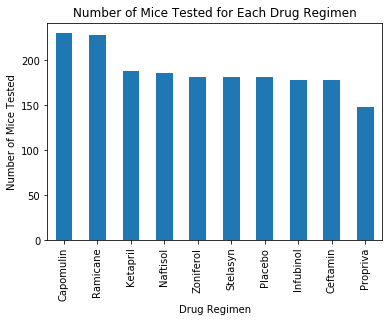

In [45]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_plot_pandas = cleaned_df.groupby(['Drug Regimen'])['Timepoint'].count()
bar_plot_pandas.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.title('Number of Mice Tested for Each Drug Regimen')
plt.show()

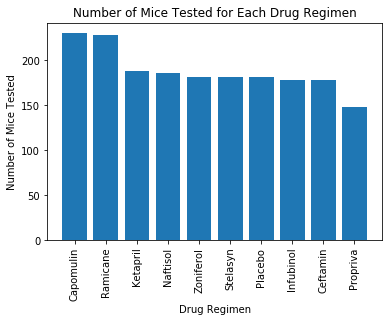

In [58]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
bar_plot_pyplot = cleaned_df.groupby(['Drug Regimen'])['Timepoint'].count().sort_values(ascending=False)
plt.bar(bar_plot_pyplot.index, bar_plot_pyplot.values)
plt.xticks(rotation='vertical')
plt.title('Number of Mice Tested for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.show()

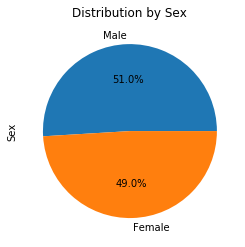

In [77]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
by_sex = cleaned_df['Sex'].value_counts()
pie_plot_pandas = by_sex.plot(kind='pie', autopct='%1.1f%%', title='Distribution by Sex')
plt.show()

Text(0, 0.5, 'Sex')

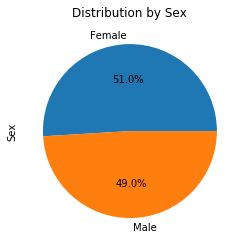

In [78]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(by_sex, labels=('Female', 'Male'), autopct="%1.1f%%")
plt.title('Distribution by Sex')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [79]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_tumor_vol_df = pd.DataFrame(cleaned_df.groupby(['Mouse ID'])['Timepoint'].max())

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_df = pd.merge(cleaned_df, final_tumor_vol_df, how='right', on=('Mouse ID', 'Timepoint'))
final_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [83]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
cap_tum_vol = []
ram_tum_vol = []
inf_tum_vol = []
cef_tum_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in final_df.iterrows(): 
    if row['Drug Regimen'] == 'Capomulin': 
        cap_tum_vol.append(row['Tumor Volume (mm3)'])
    if row['Drug Regimen'] == 'Ramicane':
        ram_tum_vol.append(row['Tumor Volume (mm3)'])
    if row['Drug Regimen'] == 'Infubinol':
        inf_tum_vol.append(row['Tumor Volume (mm3)'])
    if row['Drug Regimen'] == 'Ceftamin':
        cef_tum_vol.append(row['Tumor Volume (mm3)'])
    
    # add subset 
treatments_df = pd.DataFrame({'Capomulin': cap_tum_vol, 
                            'Ramicane': ram_tum_vol, 
                            'Infubinol': inf_tum_vol, 
                            'Ceftamin': cef_tum_vol
                            })
treatments_df

    

,Capomulin,Ramicane,Infubinol,Ceftamin
0,23.343598,22.050126,67.973419,62.999356
1,28.484033,29.128472,65.525743,45.000000
2,28.430964,30.276232,57.031862,56.057749
3,30.485985,30.564625,66.083066,55.742829
4,31.023923,30.638696,72.226731,48.722078
5,31.896238,31.560470,36.321346,47.784682
6,32.377357,31.095335,60.969711,61.849023
7,33.329098,33.397653,62.435404,68.923185
8,34.455298,32.978522,60.918767,67.748662
9,37.311846,33.562402,67.289621,57.918381


In [86]:
# Calculations for Capomulin
quartiles_cap = treatments_df[treatments[0]].quantile([.25,.5,.75])
lowerq_cap = quartiles_cap[0.25]
med_cap = quartiles_cap[0.5]
upperq_cap = quartiles_cap[0.75]
iqr_cap = upperq_cap - lowerq_cap
# Determine outliers using upper and lower bounds
lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
upper_bound_cap = upperq_cap + (1.5*iqr_cap)
max_cap = treatments_df[treatments[0]].max()
min_cap = treatments_df[treatments[0]].min()

# Calculations for Ramicane
quartiles_ram = treatments_df[treatments[1]].quantile([.25,.5,.75])
lowerq_ram = quartiles_ram[0.25]
med_ram = quartiles_ram[0.5]
upperq_ram = quartiles_ram[0.75]
iqr_ram = upperq_ram - lowerq_ram
# Determine outliers using upper and lower bounds
lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
upper_bound_ram = upperq_ram + (1.5*iqr_ram)
max_ram = treatments_df[treatments[1]].max()
min_ram = treatments_df[treatments[1]].min()

# Calculations for Infubinol 
quartiles_inf = treatments_df[treatments[2]].quantile([.25,.5,.75])
lowerq_inf = quartiles_inf[0.25]
med_inf = quartiles_inf[0.5]
upperq_inf = quartiles_inf[0.75]
iqr_inf = upperq_inf - lowerq_inf
# Determine outliers using upper and lower bounds
lower_bound_inf = lowerq_inf - (1.5*iqr_inf)
upper_bound_inf = upperq_inf + (1.5*iqr_inf)
max_inf = treatments_df[treatments[2]].max()
min_inf = treatments_df[treatments[2]].min()

# Calculations for Ceftamin
quartiles_cef = treatments_df[treatments[3]].quantile([.25,.5,.75])
lowerq_cef = quartiles_cef[0.25]
med_cef = quartiles_cef[0.5]
upperq_cef = quartiles_cef[0.75]
iqr_cef = upperq_cef - lowerq_cef
# Determine outliers using upper and lower bounds
lower_bound_cef = lowerq_cef - (1.5*iqr_cef)
upper_bound_cef = upperq_cef + (1.5*iqr_cef)
max_cef = treatments_df[treatments[3]].max()
min_cef = treatments_df[treatments[3]].min()

calculations = pd.DataFrame({'Treatment': treatments, 
                             'Minimum': [min_cap, min_ram, min_inf, min_cef], 
                             'Lower Bound': [lower_bound_cap, lower_bound_ram, lower_bound_inf, lower_bound_cef], 
                             'Lower Quartile': [lowerq_cap, lowerq_ram, lowerq_inf, lowerq_cef], 
                             'Median': [med_cap, med_ram, med_inf, med_cef], 
                             'Upper Quartile': [upperq_cap, upperq_ram, upperq_inf, upperq_cef],
                             'IQR': [iqr_cap, iqr_ram, iqr_inf, iqr_cef],
                             'Upper Bound': [upper_bound_cap, upper_bound_ram, upper_bound_inf, upper_bound_cef], 
                             'Max': [max_cap, max_ram, max_inf, max_cef]
                             })
calculations

,Treatment,Minimum,Lower Bound,Lower Quartile,Median,Upper Quartile,IQR,Upper Bound,Max
0,Capomulin,23.343598,20.704562,32.377357,38.125164,40.159220,7.781863,51.832015,47.685963
1,Ramicane,22.050126,17.912664,31.560470,36.561652,40.659006,9.098537,54.306811,45.220869
2,Infubinol,36.321346,36.832905,54.048608,60.165180,65.525743,11.477135,82.741446,72.226731
3,Ceftamin,45.000000,25.355450,48.722078,59.851956,64.299830,15.577752,87.666458,68.923185


### Infubinol has one potential outlier due to the minimum being less than the lower bound. The outlier mouse given Infubinol has a tumor size of 36.321 mm. 

In [87]:
# used this as a check for my calculations for min, lower quartile, median, upper quartile, and max 
treatments_df.describe()

,Capomulin,Ramicane,Infubinol,Ceftamin
count,25.000000,25.000000,25.000000,25.000000
mean,36.667568,36.191390,58.178246,57.753977
std,5.715188,5.671539,8.602957,8.365568
min,23.343598,22.050126,36.321346,45.000000
25%,32.377357,31.560470,54.048608,48.722078
50%,38.125164,36.561652,60.165180,59.851956
75%,40.159220,40.659006,65.525743,64.299830
max,47.685963,45.220869,72.226731,68.923185


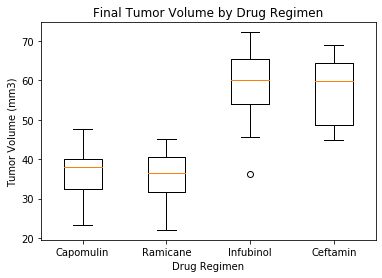

In [90]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_list = [treatments_df[treatments[0]], 
                treatments_df[treatments[1]], 
                treatments_df[treatments[2]], 
                treatments_df[treatments[3]]
                ]

fig, axis = plt.subplots()
axis.set_title('Final Tumor Volume by Drug Regimen')
axis.set_xlabel('Drug Regimen')
axis.set_ylabel('Tumor Volume (mm3)')
axis.boxplot(boxplot_list)
plt.xticks([1,2,3,4], treatments)
plt.show()

## Line and Scatter Plots

In [92]:
# Gathering data for line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_plot_df = cleaned_df.loc[cleaned_df['Mouse ID'] == 'l509', :]
line_plot_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207289,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


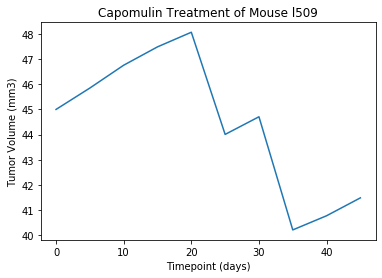

In [94]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x_axis = line_plot_df['Timepoint']
y_axis = line_plot_df['Tumor Volume (mm3)']
plt.title('Capomulin Treatment of Mouse l509')
plt.plot(x_axis, y_axis)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [95]:
# Gathering data for scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_plot_df = cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Capomulin', :]
scatter_plot_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1439,r157,Capomulin,Male,22,25,0,45.000000,0
1440,r157,Capomulin,Male,22,25,5,45.597064,0
1441,r157,Capomulin,Male,22,25,10,46.059608,0


In [98]:
# Finding the average 
avg_weight = scatter_plot_df.groupby(['Mouse ID']).mean()
avg_weight

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


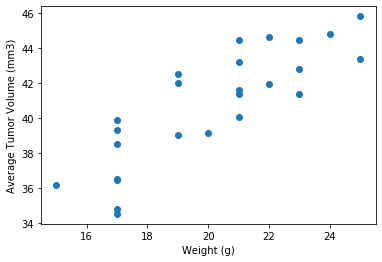

In [99]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
x_axis = avg_weight['Weight (g)']
y_axis = avg_weight['Tumor Volume (mm3)']
plt.scatter(x_axis, y_axis)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [102]:
# Calculate the correlation coefficient model for mouse weight and average tumor volume for the Capomulin regimen
weight = avg_weight['Weight (g)']
average = avg_weight['Tumor Volume (mm3)']
correlation = st.pearsonr(weight , average)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and the average tumor volume is 0.84


In [108]:
# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = avg_weight['Weight (g)']
y_values = avg_weight['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'y = 0.95x + 21.55'

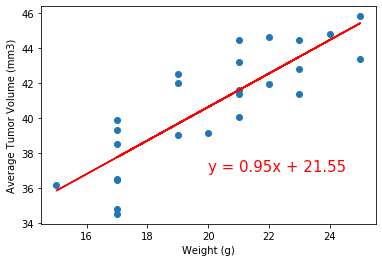

The r-squared is: 0.7088568047708717


In [127]:
# Plot the scatterplot and linear regression equation. 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20,37), fontsize=15, color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
print(f"The r-squared is: {rvalue**2}")